         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

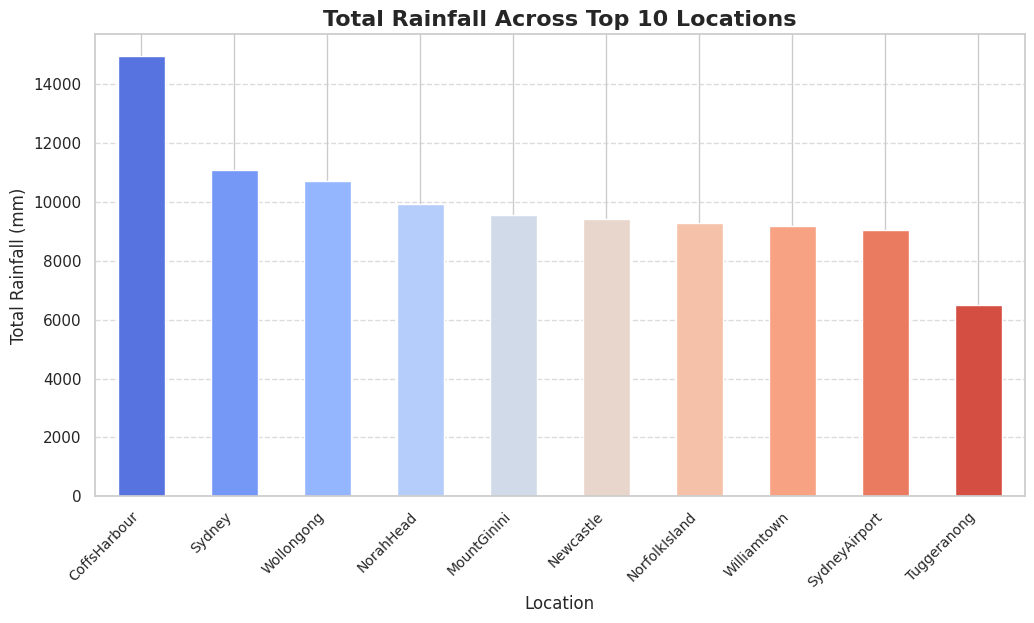

<Figure size 1200x600 with 0 Axes>

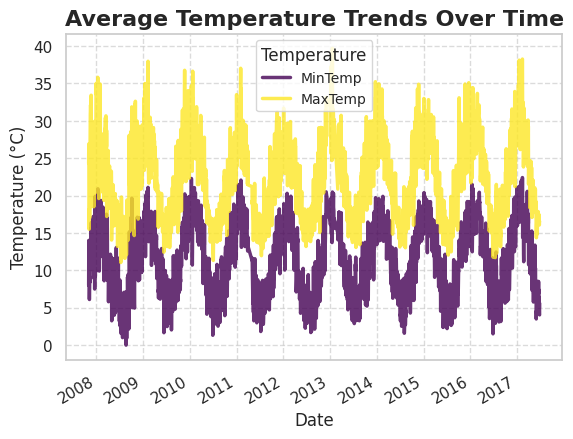

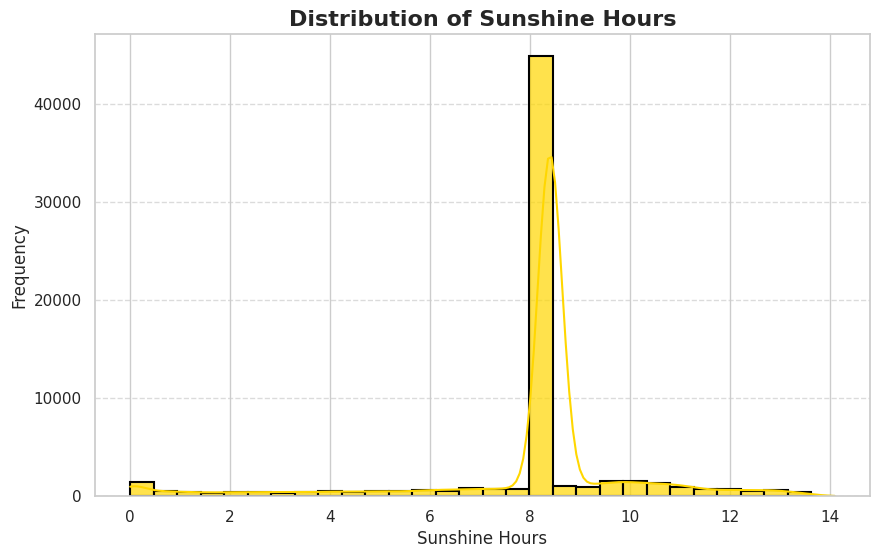

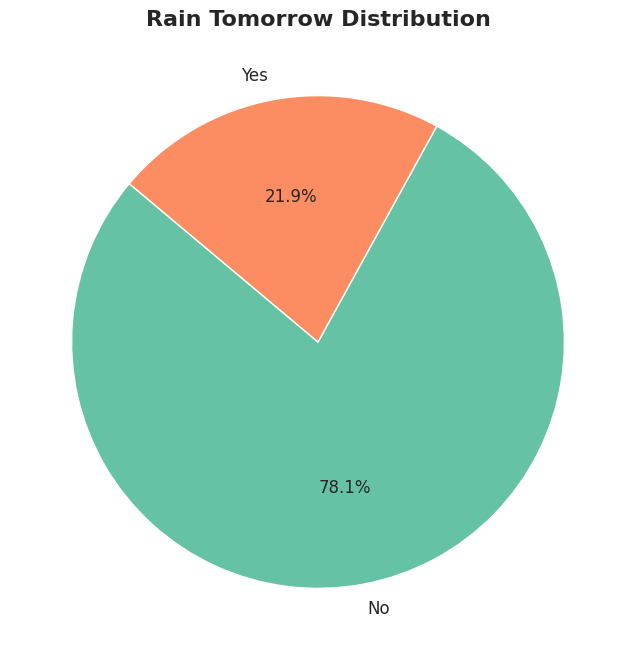

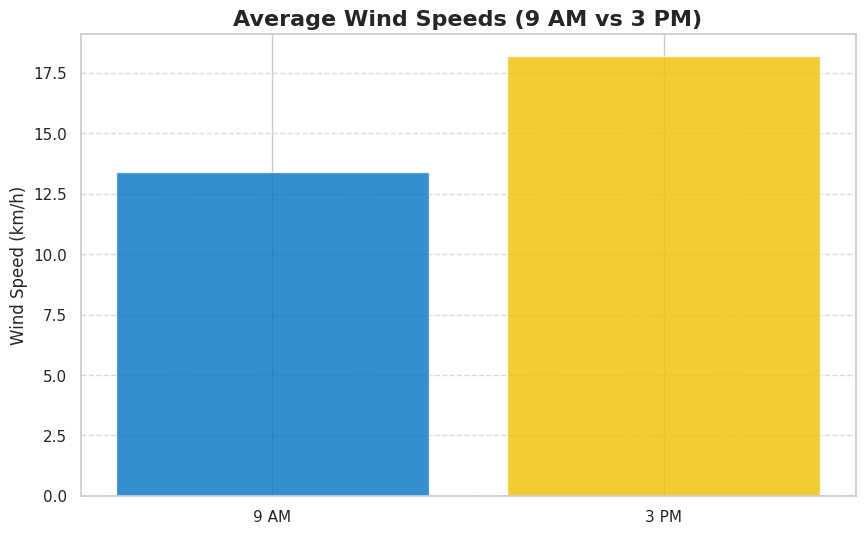

+-------+-------------------------------+-------------+-------------+-------------+---------------+-------------+-----------------+----------------+----------------+---------------+---------------+---------------+---------------+-------------+-------------+-------------+------------+
|       | Date                          |     MinTemp |     MaxTemp |    Rainfall |   Evaporation |    Sunshine |   WindGustSpeed |   WindSpeed9am |   WindSpeed3pm |   Humidity9am |   Humidity3pm |   Pressure9am |   Pressure3pm |    Cloud9am |    Cloud3pm |     Temp9am |    Temp3pm |
+=======+===============================+=============+=============+=============+===============+=============+=================+================+================+===============+===============+===============+===============+=============+=============+=============+============+
| count | 65298                         | 65298       | 65298       | 65298       |   65298       | 65298       |      65298      |     65298    

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
rain_data_path = 'weatherAUS.csv'  # Path to the CSV file
rain_data = pd.read_csv(rain_data_path)

# Step 2: Inspect the dataset
print(rain_data.head())

# Step 3: Data Cleaning
# Convert the Date column to datetime format
rain_data['Date'] = pd.to_datetime(rain_data['Date'])

# Filling missing values in numerical columns with their median
numerical_columns = rain_data.select_dtypes(include=['float64']).columns
rain_data[numerical_columns] = rain_data[numerical_columns].fillna(rain_data[numerical_columns].median())

# Filling missing values in categorical columns with the most frequent value
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for column in categorical_columns:
    rain_data[column] = rain_data[column].fillna(rain_data[column].mode()[0])

# Verify no missing values remain
print(rain_data.isnull().sum())

# Step 4: Statistical Analysis
# Generate a statistical summary of numerical columns
rain_stats_summary = rain_data.describe()
print(rain_stats_summary)

# Step 5: Exploratory Data Analysis (EDA)
sns.set_theme(style="whitegrid")

# 1. Bar Chart: Total Rainfall Across Top 10 Locations
plt.figure(figsize=(12, 6))
top_locations_rainfall = rain_data.groupby('Location')['Rainfall'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('coolwarm', len(top_locations_rainfall))
top_locations_rainfall.plot(kind='bar', color=colors)
plt.title('Total Rainfall Across Top 10 Locations', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Line Chart: Average Temperature Trends Over Time
plt.figure(figsize=(12, 6))
rain_data.groupby('Date')[['MinTemp', 'MaxTemp']].mean().plot(
    kind='line', linewidth=2.5, alpha=0.8, cmap='viridis'
)
plt.title('Average Temperature Trends Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Temperature', fontsize=10)
plt.show()

# 3. Histogram: Distribution of Sunshine Hours
plt.figure(figsize=(10, 6))
sns.histplot(
    rain_data['Sunshine'],
    bins=30,
    kde=True,
    color='gold',
    edgecolor='black',
    alpha=0.7,
    linewidth=1.5
)
plt.title('Distribution of Sunshine Hours', fontsize=16, fontweight='bold')
plt.xlabel('Sunshine Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Pie Chart: RainTomorrow Distribution
plt.figure(figsize=(8, 8))
colors = ['#66c2a5', '#fc8d62']
rain_data['RainTomorrow'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=140, labels=['No', 'Yes'], colors=colors, textprops={'fontsize': 12}
)
plt.title('Rain Tomorrow Distribution', fontsize=16, fontweight='bold')
plt.ylabel('')  # Hide the y-axis label for aesthetics
plt.show()

# 5. Bar Chart: Wind Speed Variations (9 AM vs 3 PM)
plt.figure(figsize=(10, 6))
average_wind_speeds = [rain_data['WindSpeed9am'].mean(), rain_data['WindSpeed3pm'].mean()]
plt.bar(['9 AM', '3 PM'], average_wind_speeds, color=['#0073C2FF', '#EFC000FF'], alpha=0.8)
plt.title('Average Wind Speeds (9 AM vs 3 PM)', fontsize=16, fontweight='bold')
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display Statistical Analysis Summary in Tabular Format
import tabulate
print(tabulate.tabulate(rain_stats_summary, headers='keys', tablefmt='grid'))
